# Working with neuroimaging data in Python

We've already learned about general Python tools, but there is also a growing ecosystem of Python-based tools for working with neuroimaging data.

In this training, we will focus on `pybids`, `nibabel`, and `nilearn`.

In [1]:
%matplotlib inline
import os.path as op  # for navigating the system
from pprint import pprint  # for pretty-printing dictionaries

# ADD THIS IMPORT
import matplotlib.pyplot as plt
import numpy as np

dataset_folder = '/scratch/madlab/condassoc_bids/'

## PyBIDS
[PyBIDS](https://bids-standard.github.io/pybids/) is a package for **working with BIDS datasets**.

With PyBIDS, you can:
1. Validate datasets to make sure they're BIDS compliant.
2. Search datasets for specific files.
3. Read in metadata for files within datasets.
4. Generate citable reports summarizing datasets.
5. Apply transformations to variables in datasets for analysis.

In this training we will cover 1-3.

In [2]:
from bids import BIDSLayout

In [3]:
# Load in BIDS dataset as BIDSLayout object
layout = BIDSLayout(dataset_folder, validate=True)

In [4]:
# First let's look at the dataset description file to learn about the dataset
pprint(layout.get_dataset_description())

{'Authors': ['Adam Kimbler', 'Amanda G. Hamm', 'Aaron T. Mattfeld'],
 'BIDSVersion': '1.1.1',
 'DatasetDOI': '10.18112/openneuro.ds002078.v1.0.1',
 'License': 'CC0',
 'Name': 'Conditional Visual Associative Learning Task'}


In [5]:
# You can use the BIDSLayout object to search the data
# for different kinds of information
subjects = layout.get_subjects()
print('{} subjects in dataset'.format(len(subjects)))
print('Subject IDs: {}'.format(', '.join(subjects)))
print()

tasks = layout.get_tasks()
print('{} tasks in dataset'.format(len(tasks)))
print('Tasks: {}'.format(', '.join(tasks)))
print()

data_types = layout.get_datatypes()
print('{} data types in dataset'.format(len(data_types)))
print('Data types: {}'.format(', '.join(data_types)))

20 subjects in dataset
Subject IDs: 001, 002, 004, 005, 006, 007, 008, 009, 010, 012, 017, 018, 019, 020, 021, 022, 023, 024, 026, 027

1 tasks in dataset
Tasks: condassoc

2 data types in dataset
Data types: anat, func


In [6]:
# If you're confused about what you can search for,
# check the 'entities' attribute
# Each entity can be search with a "get_<entity>s" function
layout.entities

{'subject': <bids.layout.models.Entity at 0x7f492be84fd0>,
 'session': <bids.layout.models.Entity at 0x7f492be91da0>,
 'task': <bids.layout.models.Entity at 0x7f492be21400>,
 'acquisition': <bids.layout.models.Entity at 0x7f492be84e48>,
 'contrast': <bids.layout.models.Entity at 0x7f492be84e10>,
 'reconstruction': <bids.layout.models.Entity at 0x7f492be21668>,
 'direction': <bids.layout.models.Entity at 0x7f492be21b70>,
 'run': <bids.layout.models.Entity at 0x7f492be212b0>,
 'proc': <bids.layout.models.Entity at 0x7f492be21fd0>,
 'modality': <bids.layout.models.Entity at 0x7f492be41860>,
 'echo': <bids.layout.models.Entity at 0x7f492be41b70>,
 'recording': <bids.layout.models.Entity at 0x7f492be41e80>,
 'suffix': <bids.layout.models.Entity at 0x7f492be41fd0>,
 'scans': <bids.layout.models.Entity at 0x7f492be41cc0>,
 'fmap': <bids.layout.models.Entity at 0x7f492be4d7f0>,
 'datatype': <bids.layout.models.Entity at 0x7f492be4dbe0>,
 'extension': <bids.layout.models.Entity at 0x7f492be4def

In [7]:
# Each search function can take other entities as arguments
# For example, what repetition times exist in the dataset?
print(layout.get_RepetitionTimes())

# Ah, but what about for functional scans only?
print(layout.get_RepetitionTimes(datatype='func'))

[0.009184, 2.0]
[2.0]


In [8]:
# There is also the general search method `get` that returns BIDS-type file object
sub_runs = layout.get(subject='001', task='condassoc', extension='nii.gz')
pprint(sub_runs)

# Notice that these files are stored as BIDSImageFiles, a custom class created for pybids.
# We generally just want one thing directly from these objects- the file path.
path = sub_runs[0].path
print()
print('The file path for the first file:')
print(path)

[<BIDSImageFile filename='/scratch/madlab/condassoc_bids/sub-001/func/sub-001_task-condassoc_run-01_bold.nii.gz'>,
 <BIDSImageFile filename='/scratch/madlab/condassoc_bids/sub-001/func/sub-001_task-condassoc_run-02_bold.nii.gz'>,
 <BIDSImageFile filename='/scratch/madlab/condassoc_bids/sub-001/func/sub-001_task-condassoc_run-03_bold.nii.gz'>,
 <BIDSImageFile filename='/scratch/madlab/condassoc_bids/sub-001/func/sub-001_task-condassoc_run-04_bold.nii.gz'>,
 <BIDSImageFile filename='/scratch/madlab/condassoc_bids/sub-001/func/sub-001_task-condassoc_run-05_bold.nii.gz'>,
 <BIDSImageFile filename='/scratch/madlab/condassoc_bids/sub-001/func/sub-001_task-condassoc_run-06_bold.nii.gz'>]

The file path for the first file:
/scratch/madlab/condassoc_bids/sub-001/func/sub-001_task-condassoc_run-01_bold.nii.gz


In [9]:
# Let's get the metadata for one of the functional scans
func_file = sub_runs[0].path
pprint(layout.get_metadata(func_file))

{'AcquisitionDateTime': '1800-01-01T16:10:15',
 'BodyPartExamined': 'BRAIN',
 'ConversionSoftware': 'dcm2nii',
 'ConversionSoftwareVersion': '6-2013',
 'EchoTime': 0.025,
 'FlipAngle': 75.0,
 'ImageType': 'ORIGINAL_PRIMARY_EPI_NONE',
 'MagneticFieldStrength': 3.0,
 'Manufacturer': 'GE MEDICAL SYSTEMS',
 'ProcedureStepDescription': 'Mattfeld_WMAZE',
 'ProtocolName': 'Mattfeld_WMAZE',
 'RepetitionTime': 2.0,
 'ScanningSequence': 'EP_GR',
 'SequenceVariant': 'S_S',
 'SliceTiming': [0.0,
                 1.0,
                 0.047619047619047616,
                 1.0476190476190477,
                 0.09523809523809523,
                 1.0952380952380953,
                 0.14285714285714285,
                 1.1428571428571428,
                 0.19047619047619047,
                 1.1904761904761905,
                 0.23809523809523808,
                 1.2380952380952381,
                 0.2857142857142857,
                 1.2857142857142858,
                 0.3333333333333333,
  

### Exercise 1
Load the dataset located in `/scratch/cis-training/ds001491` and print the name of the file with the **extension** `'nii.gz'` for **echo** `1` of the `'images'` **task** of **subject** `'01'`.

In [12]:
dset_folder = '/scratch/cis-training/ds001491'
layout2 = BIDSLayout(dset_folder)
f = layout2.get(extension='nii.gz', echo=1, task='images', subject='01')

### Exercise 2
Use `BIDSLayout.get_metadata` to determine the EchoTime for that file.

In [14]:
metadata = layout2.get_metadata(f[0].path)
pprint(metadata)

{'EchoTime': 0.00802,
 'EchoTrainLength': 23,
 'FlipAngle': 80,
 'InstitutionName': 'Univerity Medical Center Groningen',
 'InstitutionalDepartmentName': 'Neuroimaging Center Groningen',
 'MagneticFieldStrength': 3,
 'Manufacturer': 'Philips',
 'ManufacturersModelName': 'Intera',
 'Modality': 'MR',
 'PatientPosition': 'HFS',
 'PhilipsRescaleIntercept': 0,
 'PhilipsRescaleSlope': 282.541,
 'PhilipsScaleSlope': 0.0011356,
 'ProtocolName': 'WIPR-state_ME_descending-sso-DSSENSE4.2',
 'ReceiveCoilName': 'SENSE-Head-32P',
 'ReconMatrixPE': 64,
 'RepetitionTime': 2.45,
 'SliceThickness': 3.5,
 'SliceTiming': [2.395555556,
                 2.341111111,
                 2.286666667,
                 2.232222222,
                 2.177777778,
                 2.123333333,
                 2.068888889,
                 2.014444444,
                 1.96,
                 1.905555556,
                 1.851111111,
                 1.796666667,
                 1.742222222,
                 1.68777

In [15]:
from bids.reports import BIDSReport
report = BIDSReport(layout)
print(report.generate().most_common()[0][0])

Number of patterns detected: 1
Remember to double-check everything and to replace <deg> with a degree symbol.
For session None:
	MR data were acquired using a 3.0-Tesla GE MEDICAL SYSTEMS MODEL MRI scanner.
	T1-weighted steady state and segmented k-space G and R (G/R) structural MRI data were collected (186 slices; repetition time, TR=9.18ms; echo time, TE=3.68ms; flip angle, FA=12.0<deg>; field of view, FOV=256x256mm; matrix size=256x256; voxel size=1x1x1mm). 
	Six runs of conditional visual associative learning task S and S echo planar and gradient recalled (EP/GR) single-echo fMRI data were collected (42 slices in interleaved ascending order; repetition time, TR=2000ms; echo time, TE=25ms; flip angle, FA=75.0<deg>; field of view, FOV=240x240mm; matrix size=96x96; voxel size=2.5x2.5x3mm). Each run was 6:40 minutes in length, during which 200 functional volumes were acquired. 

Dicoms were converted to NIfTI-1 format using dcm2nii (6-2013). This section was (in part) generated automat

## NiBabel
[NiBabel](https://nipy.org/nibabel/) allows you to **read and write neuroimaging files**.

In [16]:
import nibabel as nib

In [17]:
# Grab a random nifti file from the dataset
f = layout.get(extension='nii.gz', task='condassoc')[0].path
print(f)

/scratch/madlab/condassoc_bids/sub-001/func/sub-001_task-condassoc_run-01_bold.nii.gz


In [18]:
# Load the file as an image object
img = nib.load(f)
print(type(img))

<class 'nibabel.nifti1.Nifti1Image'>


In [19]:
# Each image has an affine matrix that contains information
# about the orientation and dimensionality of the data
print(img.affine)

[[-2.48171425e+00  5.10274842e-02  3.56942683e-01  1.11510391e+02]
 [-1.06421225e-01  2.15781951e+00 -1.50945055e+00 -5.21768532e+01]
 [ 2.82434911e-01  1.26143217e+00  2.56764340e+00 -1.02998154e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [20]:
# The image header contains a lot of its own information
hed = img.header
print(type(hed))

# get_zooms() prints the voxel sizes and
# repetition time (fourth dimension) for the image
hed.get_zooms()

<class 'nibabel.nifti1.Nifti1Header'>


(2.5, 2.5, 2.9997735, 2.0)

In [21]:
# The data are a 3D-to-4D array
data = img.get_data()
print(type(data))
print(data.shape)

<class 'numpy.ndarray'>
(96, 96, 42, 200)


In [22]:
# You can also create images from an affine matrix and a numpy array
random_data = np.random.random((96, 96, 42))
random_img = nib.Nifti1Image(random_data, img.affine)
print(type(random_img))

<class 'nibabel.nifti1.Nifti1Image'>


In [23]:
# You can also save image objects
random_img.to_filename('example_random_image.nii.gz')

### Exercise 3
Compute the mean of the data from the loaded functional scan and generate a new 3D image with the mean data.

In [27]:
arr_3d = np.mean(data, axis=3)
print(arr_3d.shape)
img_3d = nib.Nifti1Image(arr_3d, img.affine)
print(type(img_3d))

(96, 96, 42)
<class 'nibabel.nifti1.Nifti1Image'>


## Nilearn
[Nilearn](http://nilearn.github.io) is primarily for doing machine learning on fMRI data, but it also provides a wide range of functionality, including:
- Applying masks to data
- Visualizing fMRI data
- Simple denoising and analysis
- Performing simple math on images

In [28]:
import nilearn as nl
from nilearn import plotting, image, masking

first_volume = image.index_img(f, 0)

#### nilearn.masking
This submodule can be used to create masks, apply masks to data, and unmask masked data.

In [29]:
from nilearn import masking

In [30]:
# Grab a random functional file from the dataset
f = layout.get(suffix='bold', extension='nii.gz')[0].path
print(f)
print('The shape of the data in the file is {}'.format(nib.load(f).shape))

/scratch/madlab/condassoc_bids/sub-001/func/sub-001_task-condassoc_run-01_bold.nii.gz
The shape of the data in the file is (96, 96, 42, 200)


/home/data/cis/training-week-2019/env/lib/python3.6/site-packages/nilearn/image/resampling.py:510: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


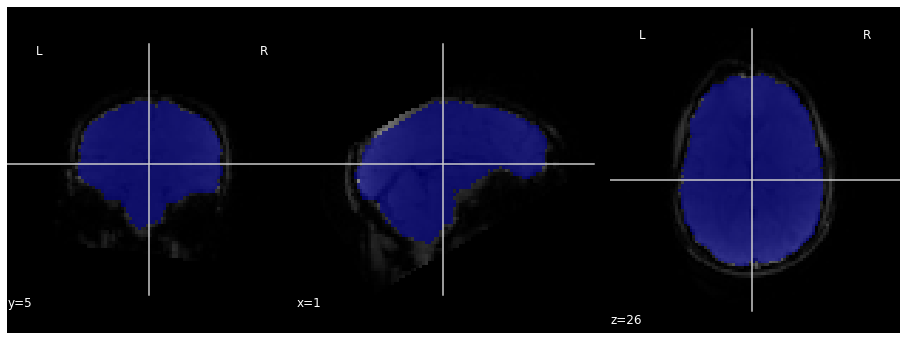

In [32]:
%matplotlib inline
# Generate a general brain mask from the functional data
mask = masking.compute_epi_mask(f)

# Let's plot it against the first volume in the functional scan
fig, ax = plt.subplots(figsize=(16, 6))
plotting.plot_roi(mask, bg_img=first_volume, axes=ax)
fig.show()

In [33]:
# Apply the mask to the file
data = masking.apply_mask(f, mask)

print('Shape of the functional data: {}'.format(nib.load(f).shape))
print('Shape of the mask: {}'.format(mask.shape))
print('Number of voxels within mask: {}'.format(np.sum(mask.get_data())))
print('Shape of the masked data: {}'.format(data.shape))

Shape of the functional data: (96, 96, 42, 200)
Shape of the mask: (96, 96, 42)
Number of voxels within mask: 63276
Shape of the masked data: (200, 63276)


In [34]:
96 * 96 * 42

387072

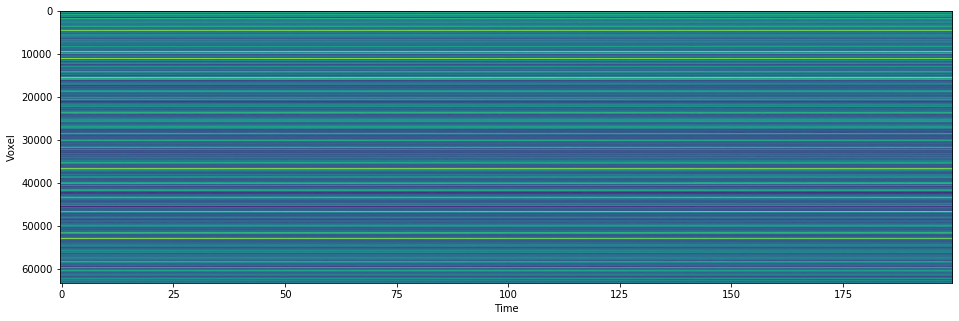

In [35]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16, 5))
ax.imshow(data.T, aspect='auto')
ax.set_xlabel('Time')
ax.set_ylabel('Voxel')
fig.show()

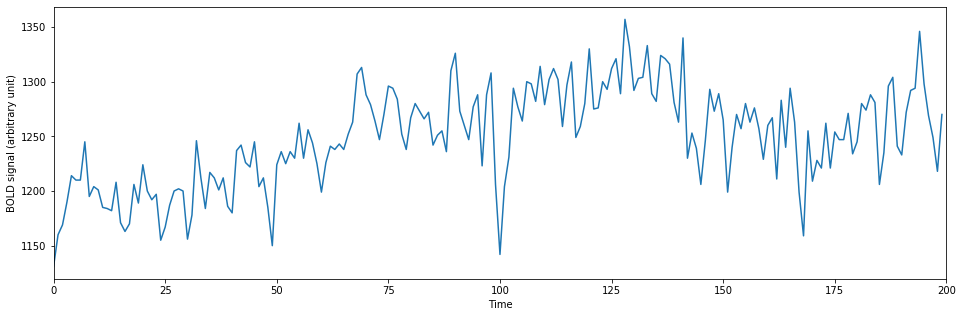

In [36]:
# Let's plot one voxel's time series
fig, ax = plt.subplots(figsize=(16, 5))
ax.plot(data[:, 0])
ax.set_xlabel('Time')
ax.set_ylabel('BOLD signal (arbitrary unit)')
ax.set_xlim(0, data.shape[0])
fig.show()

### nilearn.image
This submodule can perform operations (e.g., math, thresholding, resampling) on image files.

In [37]:
from nilearn import image

(96, 96, 42)


/home/data/cis/training-week-2019/env/lib/python3.6/site-packages/nilearn/image/resampling.py:510: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


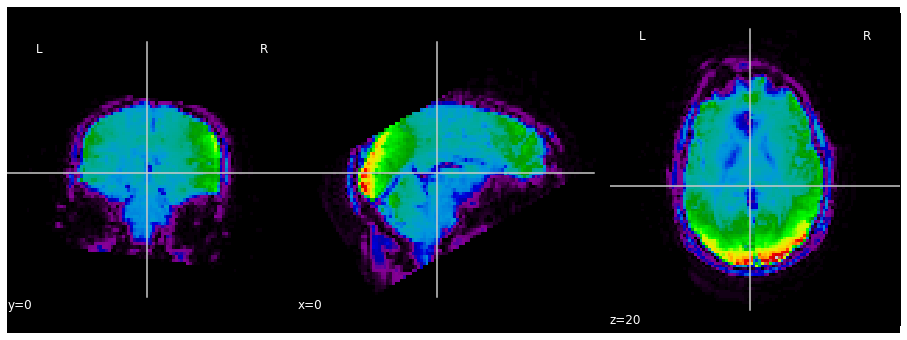

In [38]:
# We can use index_img to grab a specific
# volume within a 4D dataset
first_volume = image.index_img(f, 0)
print(first_volume.shape)

# Plot the first volume of the functional data
fig, ax = plt.subplots(figsize=(16, 6))
plotting.plot_epi(first_volume, axes=ax, cut_coords=[0, 0, 20])
fig.show()

(96, 96, 42)


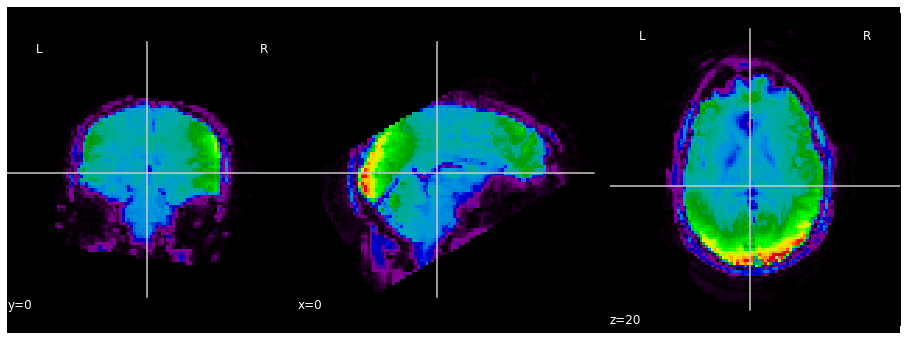

In [39]:
# We can also compute the mean image
mean_img = image.mean_img(f)
print(mean_img.shape)

# Plot the mean image
fig, ax = plt.subplots(figsize=(16, 6))
plotting.plot_epi(mean_img, axes=ax, cut_coords=[0, 0, 20])
fig.show()

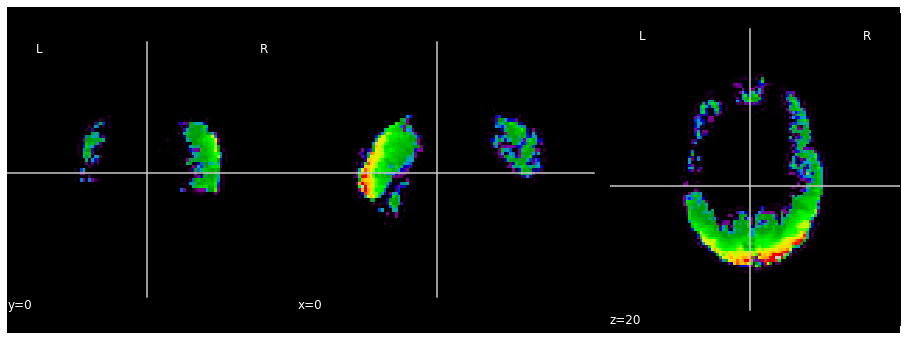

In [40]:
# Or apply a threshold
mean_img_thresh = image.threshold_img(mean_img, np.mean(masking.apply_mask(mean_img, mask)))

# Plot the first volume of the functional data
fig, ax = plt.subplots(figsize=(16, 6))
plotting.plot_epi(mean_img_thresh, axes=ax, cut_coords=[0, 0, 20])
fig.show()

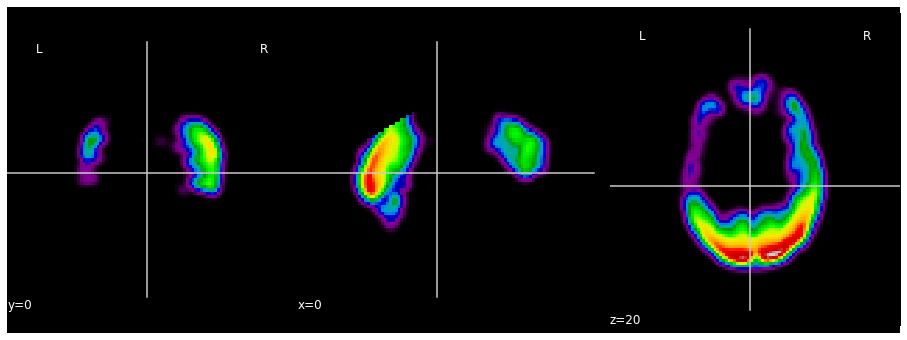

In [41]:
# Or smooth an image
smooth_mean_img_thresh = image.smooth_img(mean_img_thresh, 8)

# Plot the first volume of the functional data
fig, ax = plt.subplots(figsize=(16, 6))
plotting.plot_epi(smooth_mean_img_thresh, axes=ax, cut_coords=[0, 0, 20])
fig.show()

In [42]:
help(image.smooth_img)

Help on function smooth_img in module nilearn.image.image:

smooth_img(imgs, fwhm)
    Smooth images by applying a Gaussian filter.
    
    Apply a Gaussian filter along the three first dimensions of arr.
    In all cases, non-finite values in input image are replaced by zeros.
    
    Parameters
    ----------
    imgs: Niimg-like object or iterable of Niimg-like objects
        See http://nilearn.github.io/manipulating_images/input_output.html
        Image(s) to smooth.
    
    fwhm: scalar, numpy.ndarray, 'fast' or None
        Smoothing strength, as a Full-Width at Half Maximum, in millimeters.
        If a scalar is given, width is identical on all three directions.
        A numpy.ndarray must have 3 elements, giving the FWHM along each axis.
        If fwhm == 'fast', a fast smoothing will be performed with
        a filter [0.2, 1, 0.2] in each direction and a normalisation
        to preserve the scale.
        If fwhm is None, no filtering is performed (useful when just r

### Exercise 4
Use [nilearn.image.math_img](http://nilearn.github.io/modules/generated/nilearn.image.math_img.html#nilearn.image.math_img) to square the last volume in the functional dataset, then plot it.

### nilearn.datasets
Nilearn has the ability to download a range of datasets and useful images from the internet.

In [43]:
from nilearn import datasets

In [44]:
# Let's show what functions there are in this module
from inspect import getmembers, isfunction

functions_list = [o[0] for o in getmembers(datasets) if isfunction(o[1])]
print('\n'.join(functions_list))

fetch_abide_pcp
fetch_adhd
fetch_atlas_aal
fetch_atlas_allen_2011
fetch_atlas_basc_multiscale_2015
fetch_atlas_craddock_2012
fetch_atlas_destrieux_2009
fetch_atlas_harvard_oxford
fetch_atlas_msdl
fetch_atlas_pauli_2017
fetch_atlas_schaefer_2018
fetch_atlas_smith_2009
fetch_atlas_surf_destrieux
fetch_atlas_talairach
fetch_atlas_yeo_2011
fetch_cobre
fetch_coords_dosenbach_2010
fetch_coords_power_2011
fetch_haxby
fetch_haxby_simple
fetch_icbm152_2009
fetch_icbm152_brain_gm_mask
fetch_localizer_button_task
fetch_localizer_calculation_task
fetch_localizer_contrasts
fetch_megatrawls_netmats
fetch_mixed_gambles
fetch_miyawaki2008
fetch_neurovault
fetch_neurovault_auditory_computation_task
fetch_neurovault_ids
fetch_neurovault_motor_task
fetch_nyu_rest
fetch_oasis_vbm
fetch_surf_fsaverage
fetch_surf_fsaverage5
fetch_surf_nki_enhanced
get_data_dirs
load_mni152_brain_mask
load_mni152_template


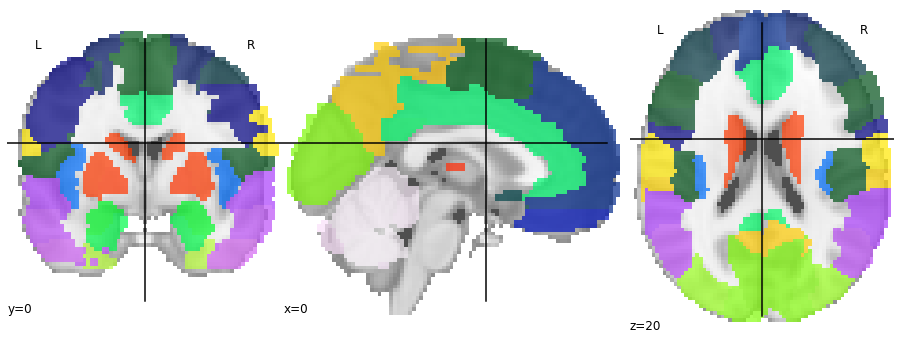

In [45]:
# We can fetch atlases
aal = datasets.fetch_atlas_aal()

# Let's plot this atlas
fig, ax = plt.subplots(figsize=(16, 6))
plotting.plot_roi(aal['maps'], axes=ax, cut_coords=[0, 0, 20])
fig.show()

/home/data/cis/training-week-2019/env/lib/python3.6/site-packages/numpy/lib/npyio.py:2358: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)
/home/data/cis/training-week-2019/env/lib/python3.6/site-packages/nilearn/plotting/displays.py:98: UserWarning: No contour levels were found within the data range.
  **kwargs)


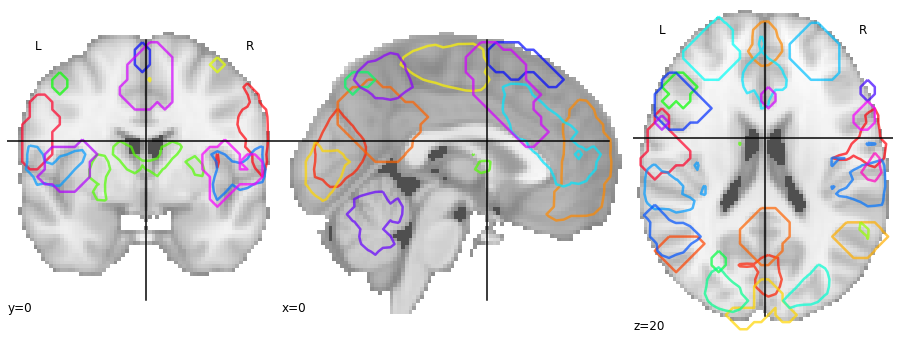

In [46]:
# We can also fetch and plot *probabilistic* atlases, like MSDL
atlas = datasets.fetch_atlas_msdl()

# Let's plot this atlas
fig, ax = plt.subplots(figsize=(16, 6))
plotting.plot_prob_atlas(atlas['maps'], axes=ax, cut_coords=[0, 0, 20])
fig.show()

### Exercise 5
Fetch and plot the `'sub-maxprob-thr25-2mm'` version of the Harvard-Oxford atlas. Determine if it's a probabilistic atlas (atlas is a 4D image) or a deterministic one (atlas is a 3D image).
Hint: Use the [documentation](http://nilearn.github.io/modules/generated/nilearn.datasets.fetch_atlas_harvard_oxford.html#nilearn.datasets.fetch_atlas_harvard_oxford) to figure out what arguments are required.

## Other packages
Some other neuroimaging-related Python packages to know include:
- nistats: Modeling and GLMs for fMRI
- Nipype: Python wrappers for non-Python neuroimaging tools
- heudiconv: Automated conversion of scanner data to BIDS format
- DiPy: Diffusion-weighted imaging processing and analysis in Python